In [14]:
import pandas as pd
import numpy as np
import sklearn
print("Hello!")

Hello!


In [19]:
import pandas as pd
data={
    "Id":list(range(1, 21)),
    "NAME":["Akalya","Aravind","Priya","Aruna Devi","Brundhadevi","Rahul","Archana","Kaaarunya","Raja","Ravi","Lakshmi","Ashika","Anita","Manoj","Chaaru","Vikram","Nisha","Rajan","Geetha","Varun"],
    "AGE":[23,27,25,22,24,26,21,23,22,24,25,27,23,22,24,26,25,23,22,24],
    "DEPARTMENT":["CSE","ECE","IT","CSE","EEE","CSE","IT","ECE","CSE","EEE","IT","CSE","ECE","EEE","CSE","IT","ECE","CSE","EEE","IT"],
    "MARKS":[85,90,78,88,92,76,81,95,89,84,77,91,86,80,93,79,87,82,90,88],
    "ATTANDANCE":[92,95,88,90,96,85,89,94,91,87,90,93,88,86,95,89,92,90,94,91],
    "GRADE":["A","A+","B+","A","A+","B","B+","A+","A","B+","B","A","A","B","A+","B","A","B+","A+","A"]
}
df=pd.DataFrame(data)
df.to_csv("../data/raw_data.csv",index=False)
print("CSV dataset created successfully!")

CSV dataset created successfully!


In [20]:
df_check=pd.read_csv("../data/raw_data.csv")
df_check.head(10)

,Id,NAME,AGE,DEPARTMENT,MARKS,ATTANDANCE,GRADE
0,1,Akalya,23,CSE,85,92,A
1,2,Aravind,27,ECE,90,95,A+
2,3,Priya,25,IT,78,88,B+
3,4,Aruna Devi,22,CSE,88,90,A
4,5,Brundhadevi,24,EEE,92,96,A+
5,6,Rahul,26,CSE,76,85,B
6,7,Archana,21,IT,81,89,B+
7,8,Kaaarunya,23,ECE,95,94,A+
8,9,Raja,22,CSE,89,91,A
9,10,Ravi,24,EEE,84,87,B+


In [21]:
import pandas as pd
df=pd.read_csv("../data/raw_data.csv")
print("Raw data:",df.shape)
df.head()

Raw data: (20, 7)


,Id,NAME,AGE,DEPARTMENT,MARKS,ATTANDANCE,GRADE
0,1,Akalya,23,CSE,85,92,A
1,2,Aravind,27,ECE,90,95,A+
2,3,Priya,25,IT,78,88,B+
3,4,Aruna Devi,22,CSE,88,90,A
4,5,Brundhadevi,24,EEE,92,96,A+


In [48]:
from sklearn.preprocessing import MinMaxScaler
df.columns=df.columns.str.strip().str.upper()
df.fillna({
    "MARKS":df["MARKS"].mean(),
    "ATTANDANCE":df["ATTANDANCE"].mean()
},
inplace=True)
df.drop_duplicates(inplace=True)
df["RESULT"]=df["MARKS"].apply(lambda x:"Pass"if x>=40 else "Fail")
df["AGE_GROUP"]=pd.cut(df["AGE"],bins=[0,18,25,30,100],labels=["Teen","Young Adult","Adult","Senior"])
scaler=MinMaxScaler()
df[["MARKS"]]=scaler.fit_transform(df[["MARKS"]])
df=pd.get_dummies(df,columns=["DEPARTMENT"],prefix="DEPT")
df.head()

,ID,NAME,AGE,MARKS,ATTANDANCE,GRADE,RESULT,AGE_GROUP,DEPT_CSE,DEPT_ECE,DEPT_EEE,DEPT_IT
0,1,Akalya,23,0.473684,92,A,Pass,Young Adult,True,False,False,False
1,2,Aravind,27,0.736842,95,A+,Pass,Adult,False,True,False,False
2,3,Priya,25,0.105263,88,B+,Pass,Young Adult,False,False,False,True
3,4,Aruna Devi,22,0.631579,90,A,Pass,Young Adult,True,False,False,False
4,5,Brundhadevi,24,0.842105,96,A+,Pass,Young Adult,False,False,True,False


In [49]:
df.to_csv("../outputs/cleaned_data.csv", index=False)
print("✅ Dataset is Cleaned!!")

✅ Dataset is Cleaned!!


In [50]:
df_raw=pd.read_csv("../data/raw_data.csv")

df=df_raw.copy()

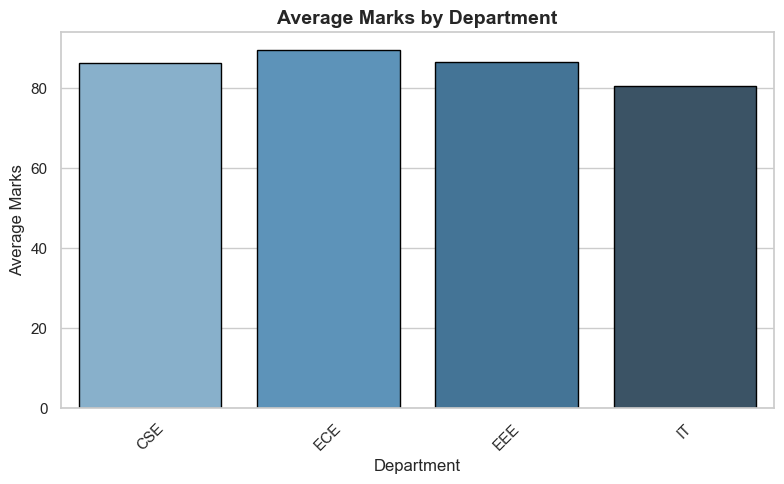

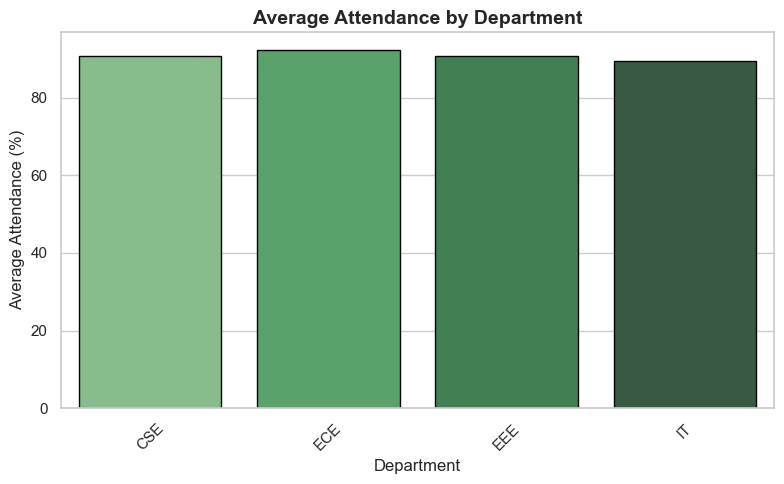

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")
plt.figure(figsize=(8,5))
sns.barplot(x=avg_marks.index,y=avg_marks.values,hue=avg_marks.index,palette="Blues_d",legend=False,edgecolor="black")
plt.title("Average Marks by Department",fontsize=14,fontweight="bold")
plt.xlabel("Department",fontsize=12)
plt.ylabel("Average Marks",fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8,5))
sns.barplot(x=avg_attendance.index,y=avg_attendance.values,hue=avg_attendance.index,palette="Greens_d",legend=False,edgecolor="black")
plt.title("Average Attendance by Department",fontsize=14,fontweight="bold")
plt.xlabel("Department",fontsize=12)
plt.ylabel("Average Attendance (%)",fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [52]:
df_raw.describe()

,Id,AGE,MARKS,ATTANDANCE
count,20.00000,20.000000,20.000000,20.00000
mean,10.50000,23.900000,85.550000,90.75000
std,5.91608,1.744163,5.679835,3.12671
min,1.00000,21.000000,76.000000,85.00000
25%,5.75000,22.750000,80.750000,88.75000
50%,10.50000,24.000000,86.500000,90.50000
75%,15.25000,25.000000,90.000000,93.25000
max,20.00000,27.000000,95.000000,96.00000


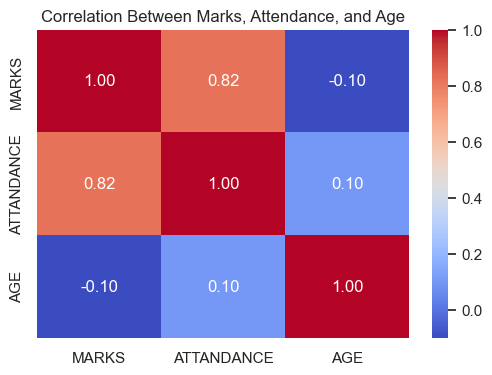

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
sns.heatmap(df_raw[["MARKS","ATTANDANCE","AGE"]].corr(),annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Marks, Attendance, and Age")
plt.show()

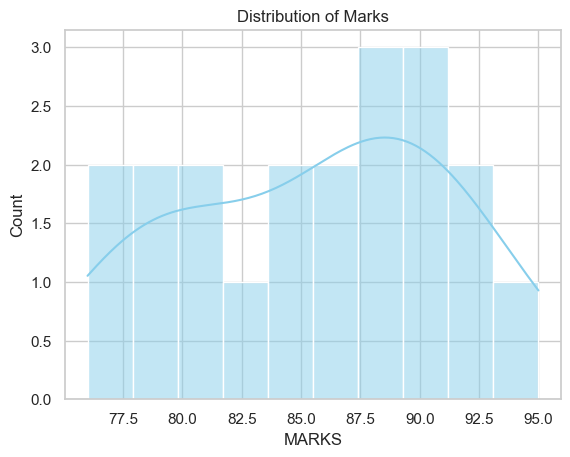

In [39]:
sns.histplot(df_raw["MARKS"],bins=10,kde=True,color="skyblue")
plt.title("Distribution of Marks")
plt.show()

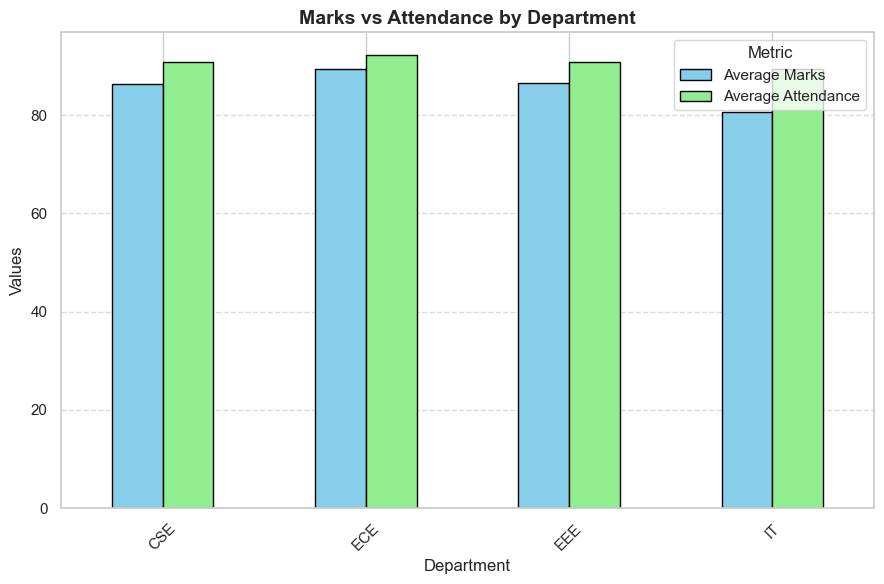

In [40]:
comparison = pd.DataFrame({
    "Average Marks": avg_marks,
    "Average Attendance": avg_attendance
})
comparison.plot(kind="bar",figsize=(9,6),edgecolor="black",color=["skyblue","lightgreen"])
plt.title("Marks vs Attendance by Department",fontsize=14,fontweight="bold")
plt.xlabel("Department")
plt.ylabel("Values")
plt.xticks(rotation=45)
plt.legend(title="Metric")
plt.grid(axis="y",linestyle="--",alpha=0.7)
plt.tight_layout()
plt.show()

In [42]:
df.to_csv("../outputs/cleaned_data.csv", index=False)
print("✅ Cleaned dataset exported successfully!")

✅ Cleaned dataset exported successfully!
